## Lab 3 - Galactic rotation

In [75]:
import matplotlib.pyplot as plt 
import numpy as np

In [76]:
Rsun = 8 # kpc
vsun = 220000 # m/s

### longitude l [°] and velocity v [m/s]

In [77]:
l = np.array([89.99255, 87.997854, 86.01696, 84.00906, 81.99759, 80.07000, 77.95953, 75.99178, 73.99966, 71.99348, 70.00052, 68.00550, 65.99581, 63.98956, 61.99490, 59.99985, 59.00081, 58.00152, 57.00221, 55.97966, 55.00358, 54.00439, 53.00506, 52.00572, 51.00638, 49.99318, 48.98937, 47.99001, 46.99065, 45.99129, 44.99192, 43.99976, 42.99103, 41.99575, 41.01899, 39.99680, 39.01774, 37.99479, 36.99507, 35.99536, 34.99564, 33.99591, 32.99619, 31.99646, 30.99673, 29.99700, 28.99726, 27.99752, 26.99778, 25.99804, 24.99830, 23.99855, 22.99881, 21.99907, 20.99932, 19.99957, 18.99027, 17.99058, 16.99088, 15.9911842, 15.01470, 13.99179, 12.99209, 11.96914])
v = np.array([4653.064, 4187.927, 5814.043, 7823.431, 7421.553, 8627.186, 8253.472, 7047.84, 6825.784, 8620.291, 8171.664, 8508.134, 19050.86, 21630.46, 27817.9, 38697.09, 33907.74, 31582.06, 36233.42, 38791.67, 39954.51, 56420.5, 62002.13, 62234.7, 52001.7, 59536.99, 64095.24, 62467.26, 62932.4, 59676.45, 58048.47, 63008.85, 70949.54, 65969.78, 72045.06, 70026.24, 81397.54, 80002.13, 85816.33, 80932.4, 85816.33, 95351.62, 95584.19, 100468.1, 109538.3, 106514.9, 98840.14, 101631, 95584.19, 107677.7, 98142.44, 101165.8, 107445.2, 109073.1, 121166.7, 119306.1, 123072.3, 128421.3, 129816.8, 139584.6, 139352, 150515.3, 145863.9, 149352.5])

In [78]:
Rmin = np.sin(l*np.pi/180) * Rsun # in kpc
v_Rmin = (v + vsun * np.sin(l*np.pi/180))/1000 # in km/s

Text(0, 0.5, 'v [km/s]')

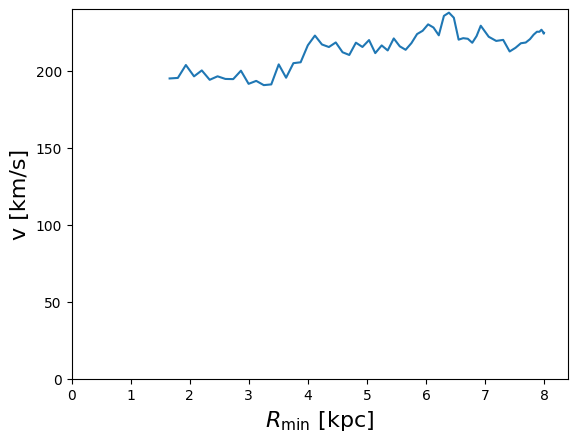

In [79]:
plt.plot(Rmin,v_Rmin)
plt.ylim(0, 240)
plt.xlim(0, 8.4)
plt.xlabel(r'$R_{\min}$ [kpc]', fontsize=16)
plt.ylabel('v [km/s]', fontsize=16)

In [80]:
# density profile

# Gravitational constant
v_Rmin = v_Rmin*1000
Rmin = Rmin*1000*3.0857*10**(16)
G = 6.674*10**(-11)

#print(Rmin[1:-1]**2)
#print(4*np.pi*G*Rmin[1:-1]**2)

central_difference = np.zeros(len(Rmin)-2)
for i in range(len(Rmin)-2):
    x_difference = np.log(Rmin[i+2])-np.log(Rmin[i])
    central_difference[i] = (np.log(v_Rmin[i+2]) - np.log(v_Rmin[i])) / (x_difference)

#print(len(central_difference))
#print(len(Rmin[:]))

rho_r = v_Rmin[1:-1]**2/(4*np.pi*G*Rmin[1:-1]**2)*(1+2*central_difference)
print(rho_r)

Rmin = Rmin/(1000*3.0857*10**(16))

[-1.29283573e-21 -3.67679384e-21  1.02015682e-21  2.21521483e-21
  2.39075396e-21  3.94992580e-21  3.71961463e-21  2.23228014e-21
  2.44654390e-21  3.03074494e-21 -6.84896187e-22 -1.17189856e-21
  5.36527383e-22 -1.70421759e-21  1.19189647e-21  7.54275519e-21
  2.22779765e-21 -2.48993611e-22  1.69876939e-21 -5.41212959e-21
 -8.29230681e-21  1.06188770e-21  9.95598437e-21  5.30369658e-21
 -1.95323196e-21  2.93536829e-21  5.00467649e-21  5.90647698e-21
  6.77537216e-21  2.76855941e-21 -1.65503639e-21  3.41629253e-21
  4.13896664e-21  2.99479701e-21  4.99551633e-22  3.13356382e-22
  3.21973098e-21  5.28701011e-21  5.51275475e-21 -1.39543973e-21
  1.14791716e-21  3.75248598e-21 -7.09306231e-22  3.97400200e-21
  1.35039046e-20  9.66215041e-21  9.41236045e-21  4.03813673e-21
  6.90512980e-21  1.12982252e-20  2.99377815e-21  4.28161562e-21
  1.14124833e-21  3.96693188e-21  9.88627521e-21  5.72193051e-21
  8.33070156e-21  5.72260850e-21  8.36194832e-21  8.24117932e-21
  1.49127783e-20  2.32009

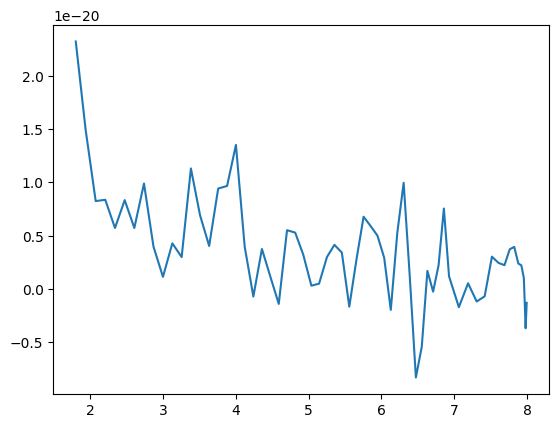

In [81]:
plt.plot(Rmin[1:-1], rho_r)